In [1]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

py.offline.init_notebook_mode(connected=True)

In [2]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data_1=temp_database['Temperature_1']
data_2=temp_database['Temperature_2']

In [8]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time=[]
tmp_1=[]
tmp_2=[]
#tmp_3=[]
avg=[]
#specifying every n'th minute
time=4
#counter
c=time
for obj in data_1.find():
    time_h=(obj['Date-Time'])
   
    #if("15:" in time_h or "15:0" in time_h):
    if("07/23/2019 13:" in time_h or "07/23/2019 14:" in time_h or "07/23/2019 15:" in time_h or "07/23/2019 16:" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            #tmp_3.append(float(obj['tmp_3']))
            #avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            c=0
        c=c+1


#d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Avg':avg}
d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2}
data_time=pd.DataFrame(d_2)
data_time=data_time.set_index('Time')
# sns.lineplot(palette="tab10", linewidth=2.5,data=data_time)

In [9]:
date_time=[]
tmp_3=[]
tmp_4=[]
avg=[]
#specifying every n'th minute
time=4
#counter
c=time
for obj in data_2.find():
    time_h=(obj['Date-Time'])
    if("07/23/2019 13:" in time_h or "07/23/2019 14:" in time_h or "07/23/2019 15:" in time_h or "07/23/2019 16:" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_3.append(float(obj['tmp_1']))
            tmp_4.append(float(obj['tmp_2']))
            c=0
        c=c+1
            #avg.append((float(obj['tmp_1'])+float(obj['tmp_2']))/2)
    
# d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Avg':avg}
d_2 = {'Time':date_time,'Temp_3':tmp_3,'Temp_4':tmp_4}
data_time_2=pd.DataFrame(d_2)
data_time_2=data_time_2.set_index('Time')
# sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_2)

In [10]:


tmp_3=tmp_3[:len(tmp_3)-6]
tmp_4=tmp_4[:len(tmp_4)-6]

In [11]:
print(len(tmp_1))
print(len(tmp_2))
print(len(tmp_3))
print(len(tmp_4))

53
53
53
53


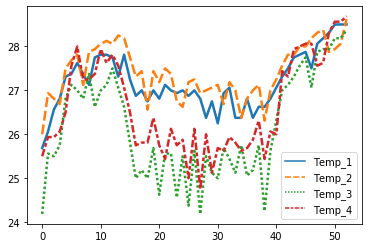

In [12]:
d_2 = {'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Temp_4':tmp_4}
data_time_join=pd.DataFrame(d_2)

sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_join)

In [13]:
data_time_join

,Temp_1,Temp_2,Temp_3,Temp_4
0,25.687,26.000,24.188,25.500
1,26.063,26.937,25.562,25.937
2,26.562,26.812,25.500,25.937
3,26.812,26.688,25.750,26.063
4,27.313,27.500,26.812,26.500
5,27.375,27.687,27.125,27.562
6,27.625,27.812,27.000,28.000
7,27.375,27.125,26.812,27.250
8,27.125,27.875,27.375,27.250
9,27.750,27.938,26.625,27.375


In [14]:
1-data_time_join.corr()

,Temp_1,Temp_2,Temp_3,Temp_4
Temp_1,0.000000,0.147319,0.133422,0.142697
Temp_2,0.147319,0.000000,0.164196,0.172020
Temp_3,0.133422,0.164196,0.000000,0.054667
Temp_4,0.142697,0.172020,0.054667,0.000000


In [57]:
data_time_join.to_csv('tempsensor_data.csv') 

In [ ]:
# custom distance metric and clustering based on it
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
def new_euclidean_distances(X, Y=None, Y_norm_squared=None, squared=False): 
    return cosine_similarity(X,Y)

# monkey patch (ensure cosine dist function is used)
from sklearn.cluster import k_means_k_means_.euclidean_distances 
k_means_.euclidean_distances = new_euclidean_distances 

SyntaxError: invalid syntax (<ipython-input-18-4de93f1a5c39>, line 5)

In [47]:
from sklearn.cluster import k_means.euclidean_distances 

SyntaxError: invalid syntax (<ipython-input-47-85e76ee74241>, line 1)

In [51]:
from sklearn.cluster.KMeans import euclidean_distances 

ModuleNotFoundError: No module named 'sklearn.cluster.KMeans'